In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.50,114,5400,19,25,22625.0
103,104,0,nissan otti,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.00,152,5200,19,25,13499.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
86,87,1,mitsubishi pajero,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.50,88,5000,25,32,8189.0
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.00,86,5800,27,33,10295.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
# First Handle Carname and carid

In [7]:
# We use only company name not model and carid is useless feature
data['company'] = [x.split()[0] for x in data['CarName']]
data = data.drop(['car_ID', 'CarName'], axis=1)
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
# Here we replace some name with suitable name
data['company'] = data['company'].replace({'maxda':'Mazda',
                                   'mazda':'Mazda',
                                   'nissan':'Nissan',
                                   'porsche':'Porsche',
                                   'porcshce':'Porsche',
                                   'toyota':'Toyota',
                                   'toyouta':'Toyata',
                                   'vokswagen':'Volkswagen',
                                   'volkswagen':'Volkswagen',
                                   'vw':'Volkswagen'})

In [9]:
def Unique(list1):
    unique_list = []
    for i in list1:
        if i not in unique_list:
            unique_list.append(i)
    return unique_list

doornumber = [x for x in data['doornumber']]
enginetype = [x for x in data['enginetype']]
cylindernumber = [x for x in data['cylindernumber']]
print(Unique(enginetype))
print(Unique(cylindernumber))
print(Unique(doornumber))

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
['two', 'four']


In [10]:
# Convert string into numbers
labelencoder = LabelEncoder()
for i in ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'company', 'enginetype']:
    data[i] = labelencoder.fit_transform(data[i])
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})
data['cylindernumber'] = data['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [12]:
# Change the position of column
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

In [13]:
data

,company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,6,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,6,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,6,1,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,7,2,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,7,2,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,22,-1,1,0,4,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,22,-1,1,1,4,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,22,-1,1,0,4,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,22,-1,0,1,4,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
# Now check correlation b/w price and features

In [15]:
len(data.select_dtypes('number').columns)

25

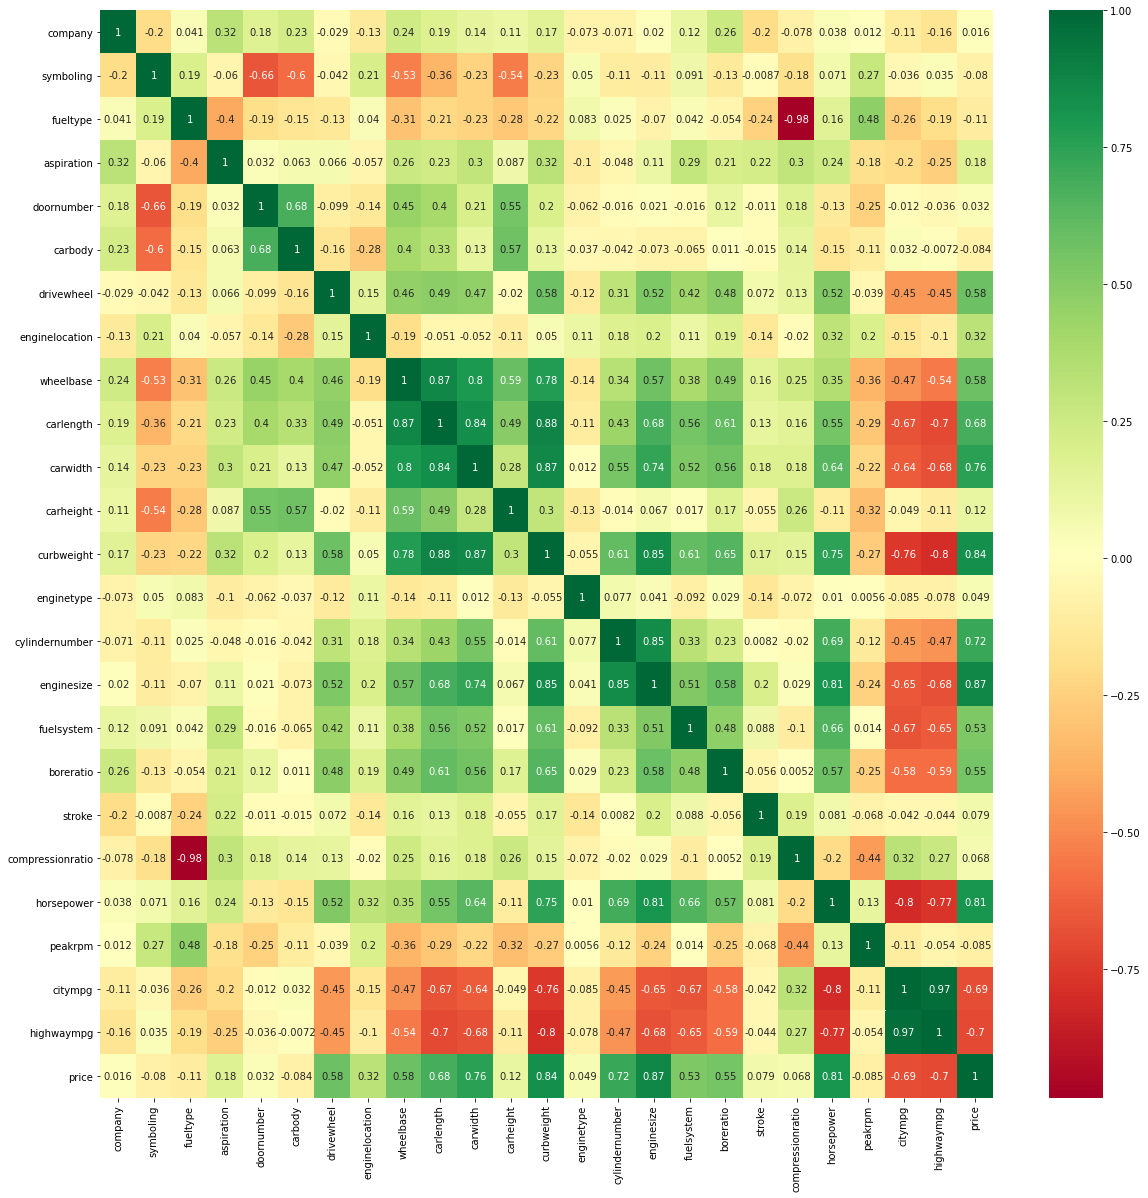

In [16]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
g = sns.heatmap(data[corrmat.index].corr(), annot=True, cmap="RdYlGn")

In [17]:
#Lets separate features and targets
X = data.loc[:,data.columns != 'price']
Y = data.loc[:,data.columns == 'price']

In [18]:
X

,company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,6,3,1,0,2,0,2,0,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,21,27
1,6,3,1,0,2,0,2,0,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,21,27
2,6,1,1,0,2,2,2,0,94.5,171.2,...,6,152,5,2.68,3.47,9.0,154,5000,19,26
3,7,2,1,0,4,3,1,0,99.8,176.6,...,4,109,5,3.19,3.40,10.0,102,5500,24,30
4,7,2,1,0,4,3,0,0,99.4,176.6,...,5,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,22,-1,1,0,4,3,2,0,109.1,188.8,...,4,141,5,3.78,3.15,9.5,114,5400,23,28
201,22,-1,1,1,4,3,2,0,109.1,188.8,...,4,141,5,3.78,3.15,8.7,160,5300,19,25
202,22,-1,1,0,4,3,2,0,109.1,188.8,...,6,173,5,3.58,2.87,8.8,134,5500,18,23
203,22,-1,0,1,4,3,2,0,109.1,188.8,...,6,145,3,3.01,3.40,23.0,106,4800,26,27


In [19]:
Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [20]:
# Now split data into train and test using train_test_split function of sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
# Now Prepare data

x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

In [22]:
y_test.describe()

,price
count,62.000000
mean,-0.055622
std,1.071123
min,-1.053997
25%,-0.718652
50%,-0.486888
75%,0.210767
max,3.562017


In [23]:
print(x_train.shape,x_train.shape[1])

(143, 24) 24


In [24]:
# Build Model
from keras import models, layers, regularizers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1))

In [25]:
# Compilation Step
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [26]:
# Train Model
model.fit(x_train, y_train, epochs=80, batch_size=1)

Epoch 1/80
143/143 [==============================] - 1s 1ms/step - loss: 0.7450 - mae: 0.5416
Epoch 2/80
143/143 [==============================] - 0s 1ms/step - loss: 0.3614 - mae: 0.3905
Epoch 3/80
143/143 [==============================] - 0s 1ms/step - loss: 0.3448 - mae: 0.3674
Epoch 4/80
143/143 [==============================] - 0s 861us/step - loss: 0.2977 - mae: 0.3683
Epoch 5/80
143/143 [==============================] - 0s 977us/step - loss: 0.2247 - mae: 0.2660
Epoch 6/80
143/143 [==============================] - 0s 933us/step - loss: 0.2371 - mae: 0.2970
Epoch 7/80
143/143 [==============================] - 0s 989us/step - loss: 0.2706 - mae: 0.3231
Epoch 8/80
143/143 [==============================] - 0s 919us/step - loss: 0.2323 - mae: 0.3093
Epoch 9/80
143/143 [==============================] - 0s 1ms/step - loss: 0.1888 - mae: 0.2673
Epoch 10/80
143/143 [==============================] - 0s 1ms/step - loss: 0.1785 - mae: 0.2607
Epoch 11/80
143/143 [==================

In [27]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1589 - mae: 0.2169


In [28]:
test_mse_score

0.1589055210351944

In [29]:
test_mae_score

0.216901957988739

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred

array([[ 1.7478864e+00],
       [ 2.7979141e-01],
       [-5.3591698e-01],
       [-1.4308654e-03],
       [ 1.8279260e+00],
       [-7.8381443e-01],
       [-6.6931218e-01],
       [-6.6711134e-01],
       [-4.2778006e-01],
       [-6.1719030e-01],
       [ 5.4016348e-02],
       [-6.9322497e-01],
       [ 5.4524201e-01],
       [-2.8657299e-01],
       [ 3.8676083e+00],
       [-8.0869752e-01],
       [-1.4935005e+00],
       [ 1.6916499e-01],
       [-6.5006423e-01],
       [-4.8524016e-01],
       [-3.9034468e-01],
       [ 2.7288845e-01],
       [-8.3079177e-01],
       [-1.2948002e+00],
       [-7.2890443e-01],
       [ 1.2223399e+00],
       [-2.5295505e-01],
       [ 3.8776410e-01],
       [-6.8591154e-01],
       [ 3.7992314e-01],
       [ 1.8656985e+00],
       [-7.9122251e-01],
       [-6.9430429e-01],
       [ 1.1849312e+00],
       [-7.1818691e-01],
       [ 1.6046200e+00],
       [-4.2946795e-01],
       [ 6.1391179e-02],
       [-8.2552886e-01],
       [ 2.0976195e-01],


In [32]:
y_pred = pd.DataFrame(y_pred, columns=['price'])

In [33]:
y_pred.values.tolist()

[[1.7478864192962646],
 [0.2797914147377014],
 [-0.5359169840812683],
 [-0.0014308653771877289],
 [1.8279260396957397],
 [-0.7838144302368164],
 [-0.6693121790885925],
 [-0.667111337184906],
 [-0.42778006196022034],
 [-0.6171903014183044],
 [0.0540163479745388],
 [-0.6932249665260315],
 [0.5452420115470886],
 [-0.28657299280166626],
 [3.8676083087921143],
 [-0.808697521686554],
 [-1.4935004711151123],
 [0.1691649854183197],
 [-0.65006422996521],
 [-0.4852401614189148],
 [-0.39034467935562134],
 [0.2728884518146515],
 [-0.8307917714118958],
 [-1.2948001623153687],
 [-0.7289044260978699],
 [1.2223398685455322],
 [-0.25295504927635193],
 [0.3877640962600708],
 [-0.6859115362167358],
 [0.37992313504219055],
 [1.8656984567642212],
 [-0.7912225127220154],
 [-0.6943042874336243],
 [1.1849311590194702],
 [-0.7181869149208069],
 [1.6046199798583984],
 [-0.42946794629096985],
 [0.06139117851853371],
 [-0.8255288600921631],
 [0.20976194739341736],
 [-0.7162873148918152],
 [-0.02774261310696602],


In [34]:
len(y_pred)

62

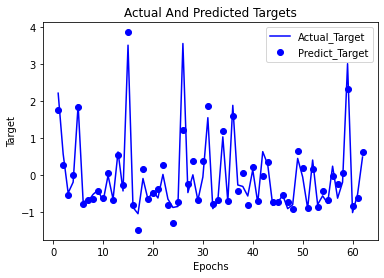

In [35]:
import matplotlib.pyplot as plt
epoch = range(1, 63)
y_test_ = y_test.values.tolist()
y_pred_ = y_pred.values.tolist()
plt.plot(epoch, y_test_, 'b', label='Actual_Target')
plt.plot(epoch, y_pred_, 'bo', label='Predict_Target')
plt.title("Actual And Predicted Targets")
plt.xlabel("Epochs")
plt.ylabel("Target")
plt.legend()
plt.show()

In [36]:
y_test['price'].mean() - y_pred['price'].mean()

0.022166007729862505